# Insurance Analytics Capstone Project
# Multiple Linear Regression for Medical Insurance Charges Prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Set the aesthetic style for plots
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')


Matplotlib created a temporary cache directory at /tmp/matplotlib-iyjvoclr because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# 1. Data Loading and Understanding
print("1. DATA LOADING AND UNDERSTANDING")
print("---------------------------------")

# Load the dataset
df = pd.read_csv('Capstone Project_Insurance Analytics.csv')

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

1. DATA LOADING AND UNDERSTANDING
---------------------------------

First 5 rows of the dataset:
   age  Gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Check dataset dimensions
print(f"\nDataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")


Dataset dimensions: 1338 rows and 7 columns


In [4]:
# Check data types and missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
# Summary statistics
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
# Check for missing values
print(f"\nTotal missing values in each column:")
print(df.isnull().sum())


Total missing values in each column:
age         0
Gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
# Identify features and target variable
features = df.drop('charges',axis=1)
target = df['charges']
print("\nFeatures:",list(features.columns))
print("Target variable: charges")


Features: ['age', 'Gender', 'bmi', 'children', 'smoker', 'region']
Target variable: charges


# 2. Exploratory Data Analysis (EDA)


2. EXPLORATORY DATA ANALYSIS
----------------------------


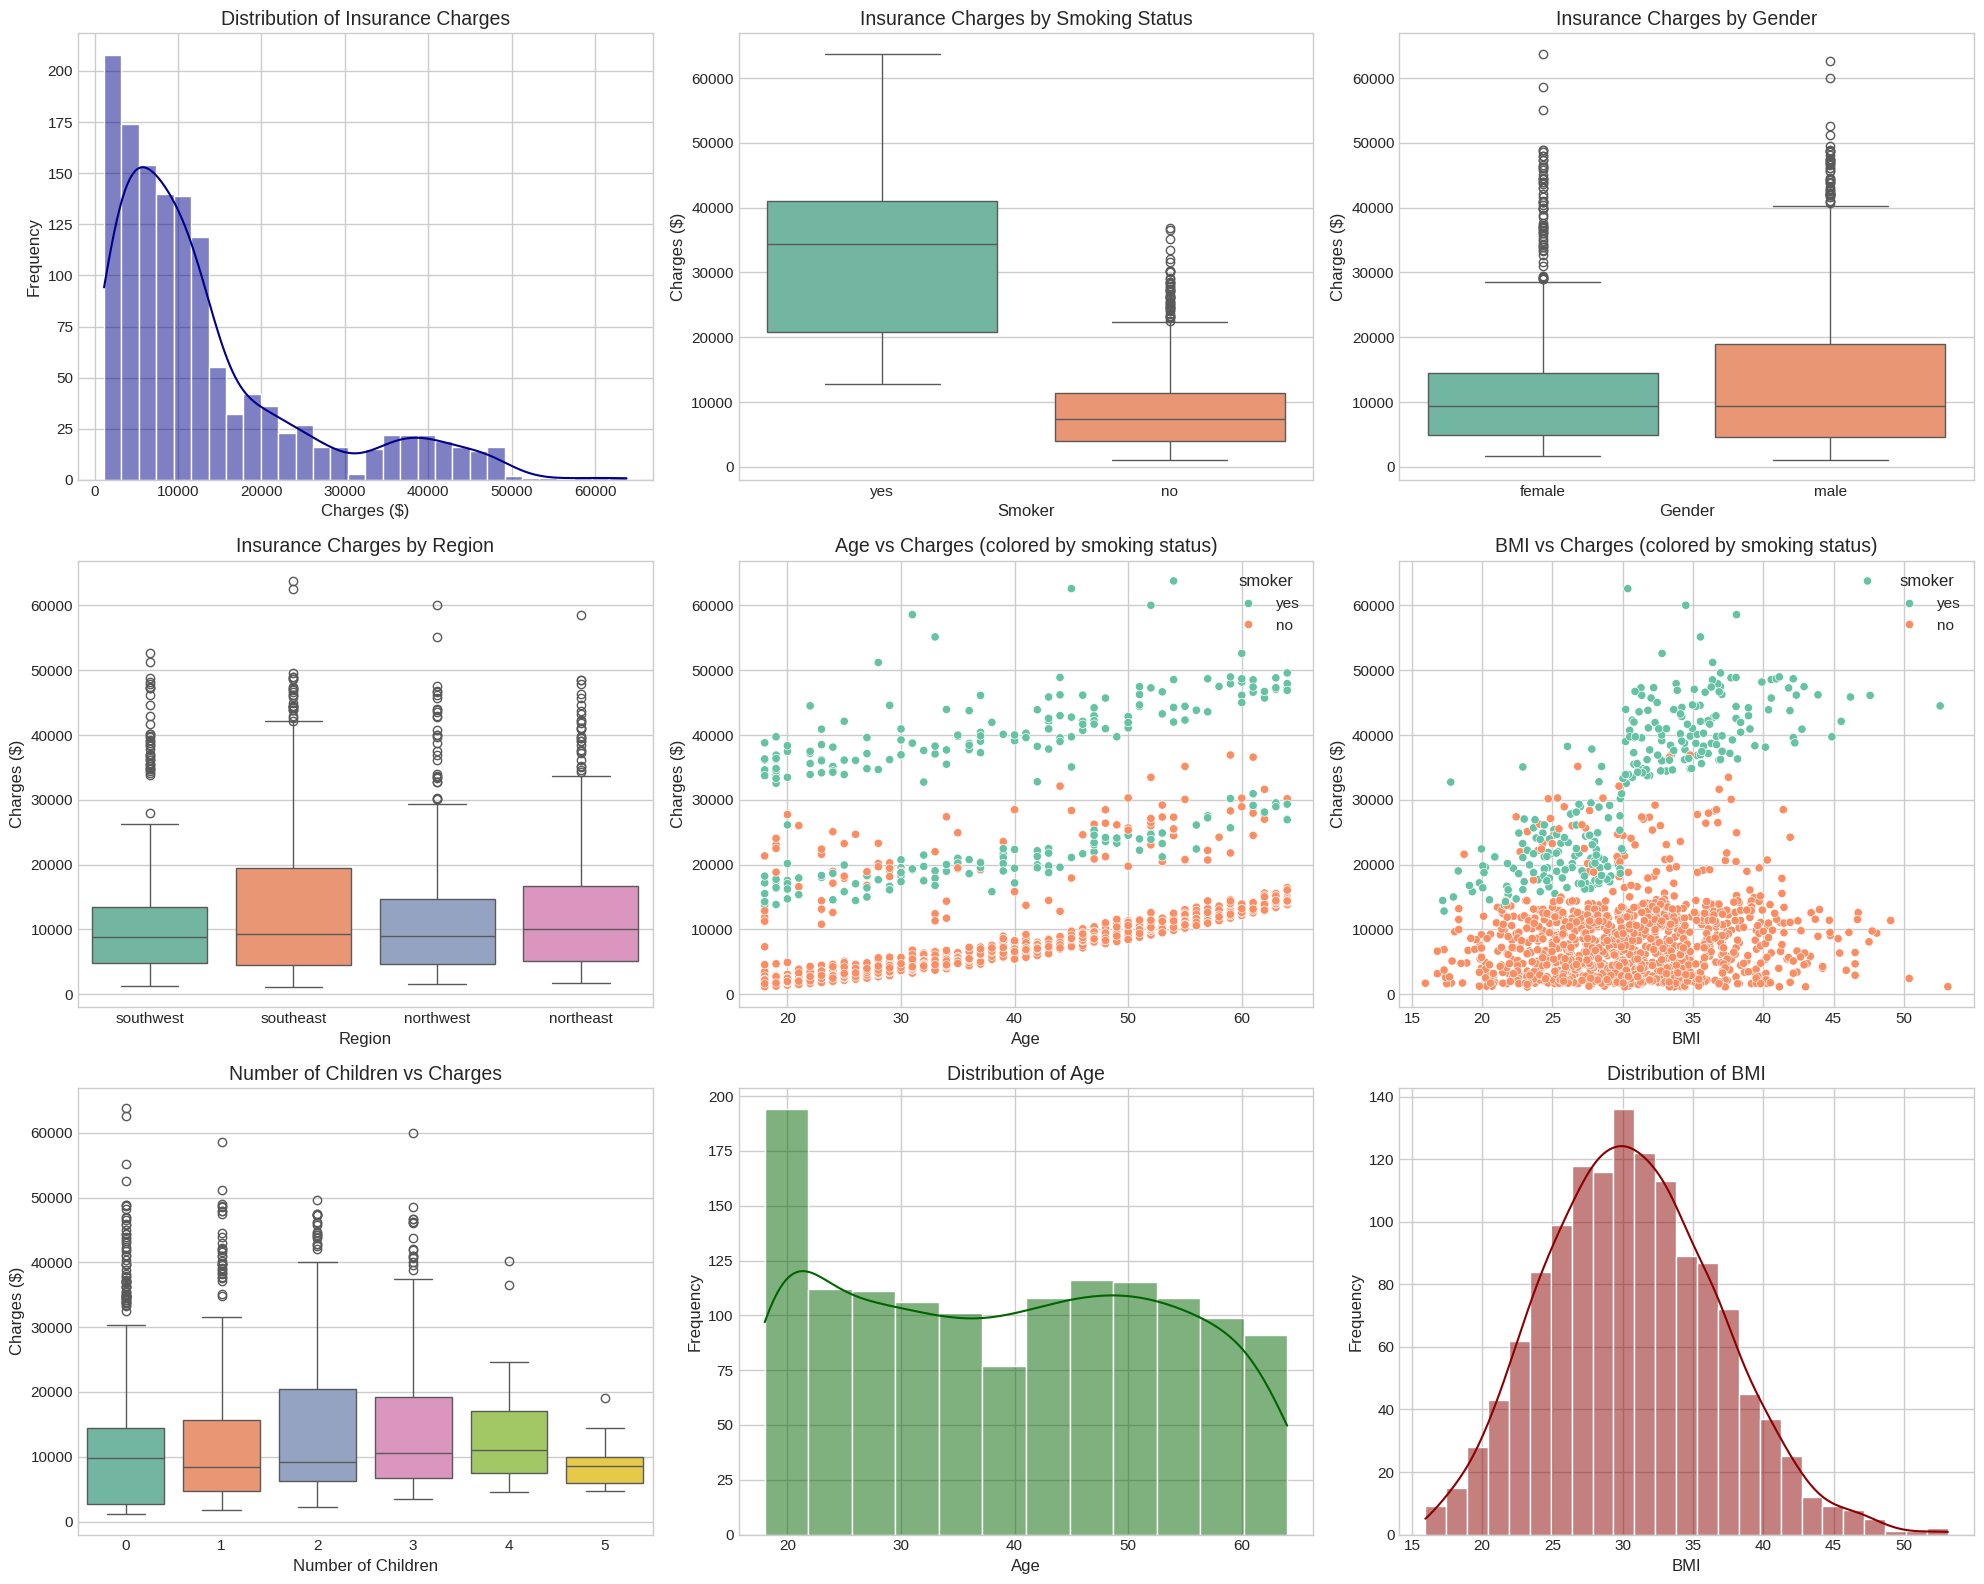

In [8]:
print("\n2. EXPLORATORY DATA ANALYSIS")
print("----------------------------")

# Set up the figure layout for visualizations
plt.figure(figsize=(20, 16))

# Distribution of target variable (charges)
plt.subplot(3,3,1)
sns.histplot(df['charges'], kde=True, color='darkblue')
plt.title('Distribution of Insurance Charges', fontsize=14)
plt.xlabel('Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Analysis of charges by smoker status
plt.subplot(3,3,2)
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Insurance Charges by Smoking Status', fontsize=14)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Analysis of charges by gender
plt.subplot(3,3,3)
sns.boxplot(x='Gender', y='charges', data=df, palette='Set2')
plt.title('Insurance Charges by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Analysis of charges by region
plt.subplot(3,3,4)
sns.boxplot(x='region', y='charges', data=df, palette='Set2')
plt.title('Insurance Charges by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Relationship between age and charges
plt.subplot(3,3,5)
sns.scatterplot(x='age',y='charges',hue='smoker',data=df,palette='Set2')
plt.title('Age vs Charges (colored by smoking status)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Relationship between BMI and charges
plt.subplot(3,3,6)
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df,palette='Set2')
plt.title('BMI vs Charges (colored by smoking status)', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Relationship between children and charges
plt.subplot(3,3,7)
sns.boxplot(x='children', y='charges', data=df, palette='Set2')
plt.title('Number of Children vs Charges', fontsize=14)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)

# Distribution of age
plt.subplot(3,3,8)
sns.histplot(df['age'], kde=True, color='darkgreen')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# distribution of BMI
plt.subplot(3,3,9)
sns.histplot(df['bmi'], kde=True, color='darkred')
plt.title('Distribution of BMI', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# output
plt.tight_layout()
plt.savefig('eda_visualizations.png')
plt.show()

### Additional analysis - Correlation heatmap for numerical features

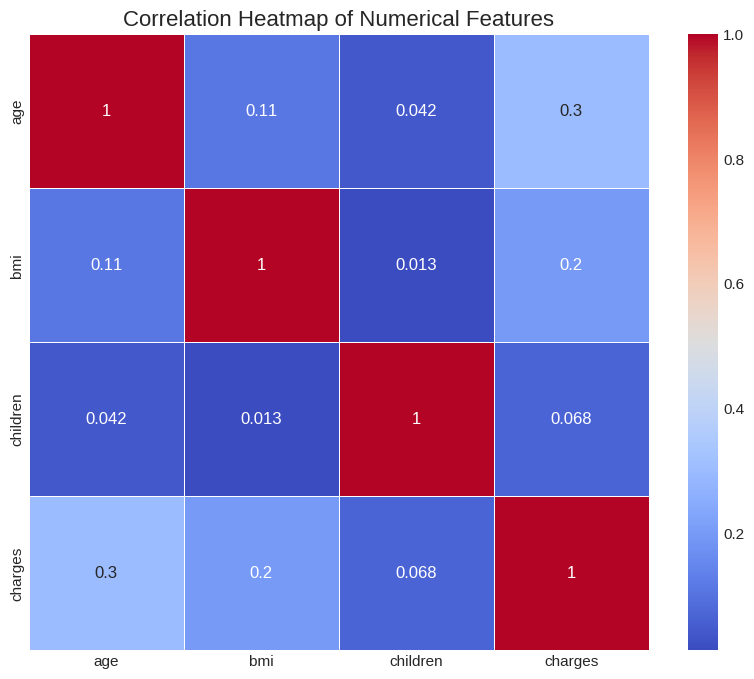


Correlation matrix of numerical features:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [9]:
numerical_features = df[['age', 'bmi', 'children', 'charges']]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features',fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()

print("\nCorrelation matrix of numerical features:")
print(correlation_matrix)

## Check for multicollinearity using Variance imflation factor (VIF)

The variance inflation factor (VIF)
So how do we detect and deal with collinearity? One way is to calculate the variance inflation factor for each feature. The VIF is given b:

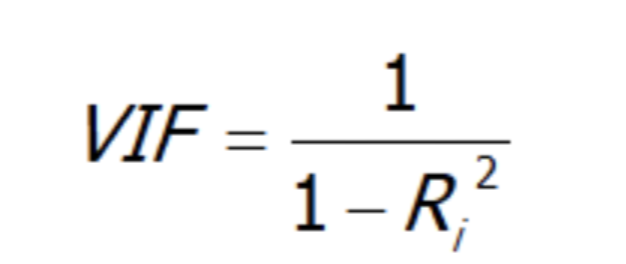

where R Square2
  is the coefficient of determination. It is generally deemed that a feature that has a VIF value greater than 5 is highly collinear with other features in the data.y

In [10]:
# We will create a copy to avoid modifying the original 

df_vif = df[['age','bmi','children','charges']]
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values,i) for i in range(df_vif.shape[1])]

print("\nVariance Inflation Factors (VIF) for numerical features:")
print(vif_data)


Variance Inflation Factors (VIF) for numerical features:
    Feature       VIF
0       age  8.098132
1       bmi  8.044400
2  children  1.800015
3   charges  2.473524


# 3. Data Preprocessing

In [11]:
print("\n3. DATA PREPROCESSING")
print("--------------------")

# Identify numerical and categorical columns
numerical_columns = ['age','bmi','children']
categorical_columns = ['Gender','smoker','region']

print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

# Create transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_columns),
        ('cat',OneHotEncoder(drop='first'),categorical_columns)
    ],
    remainder='passthrough'
)

print("\nPrprocessing steps: ")
print("1. Standardization for numerical features: age, bmi, children")
print("2. One-Hot Encoding for categorical features: Gender, smoker, region(with dropping first category)")


3. DATA PREPROCESSING
--------------------
Numerical columns: ['age', 'bmi', 'children']
Categorical columns: ['Gender', 'smoker', 'region']

Prprocessing steps: 
1. Standardization for numerical features: age, bmi, children
2. One-Hot Encoding for categorical features: Gender, smoker, region(with dropping first category)


# 4. Pipeline Construction

In [12]:
print("\n4. PIPELINE CONSTRUCTION")
print("----------------------------")

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

print("Pipeline constructed with:")
print("- Column Transformer for preprocesing")
print("- Linear Regression model for prediction")


4. PIPELINE CONSTRUCTION
----------------------------
Pipeline constructed with:
- Column Transformer for preprocesing
- Linear Regression model for prediction


# 5. Model Training

In [13]:
print("\n5. MODEL TRAINING")
print("--------------------")

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Train the model
pipeline.fit(X_train, y_train)
print("\nModel successfully trained on the training data")


5. MODEL TRAINING
--------------------
Training set: 1070 samples
Testing set: 268 samples

Model successfully trained on the training data


# 6. Model Evaluation


6. MODEL EVALUATION
--------------------
Mean squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R²): 0.7836


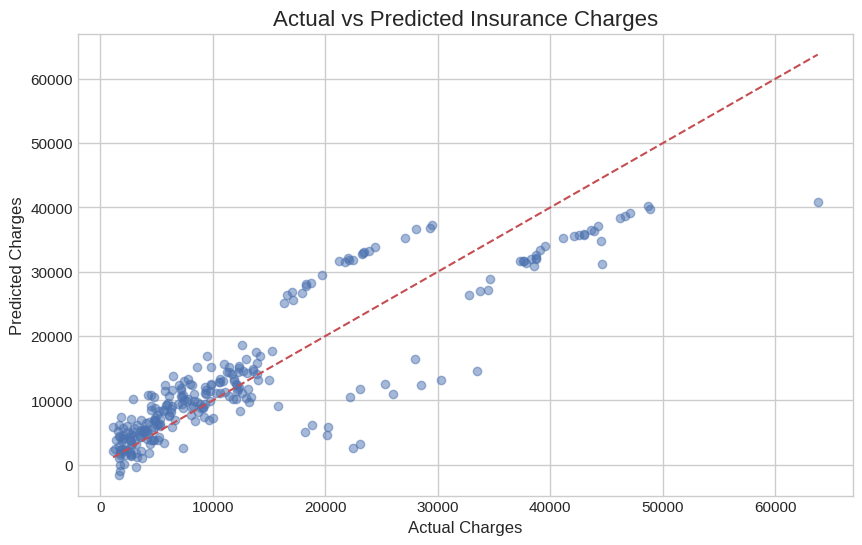

In [14]:
print("\n6. MODEL EVALUATION")
print("--------------------")

# Make prediction on test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
# we use three main ways to measure how good our predictions are
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test,y_pred)
# 2. Root mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# 3. R-squared
r2 = r2_score(y_test,y_pred)

print(f"Mean squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Insurance Charges', fontsize=16)
plt.xlabel('Actual Charges', fontsize=12)
plt.ylabel('Predicted Charges', fontsize=12)
plt.savefig('actual_vs_predicted.png')
plt.show()

#### Residual Analysis
Residuals are the differences between actual and predicted values like marking how many points a student missed on each question. We analyze in two different ways:

1. Residual Plot: Shows if our model makes bigger mistakes on certain predications.
2. Residual Distribution: Shows how our prediction errors are distributed.

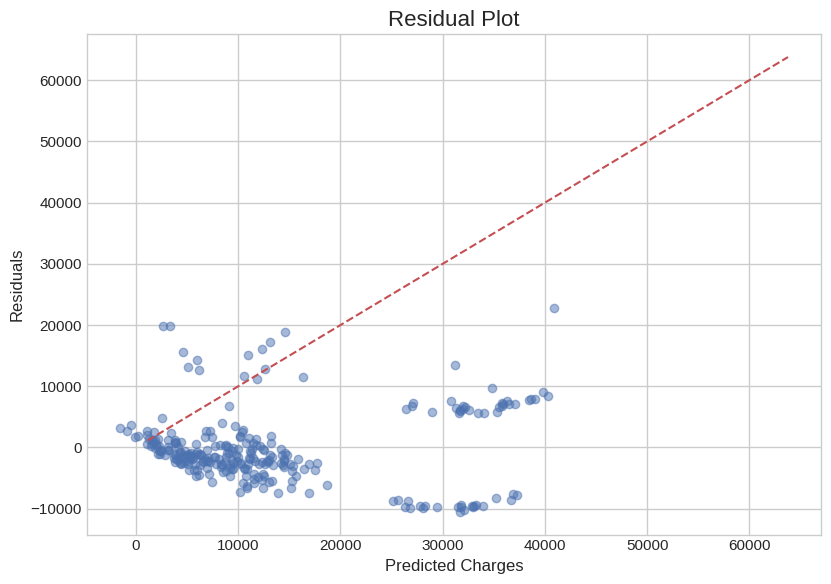


Residual Analysis:
Mean of residuals: -219.2407
Standard deviation of residuals: 5792.1369


In [15]:
# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(16,6))
# Res plot
plt.subplot(1,2,1)
plt.scatter(y_pred,residuals,alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Charges', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.tight_layout()
plt.savefig('residual_analysis.png')
plt.show()

print("\nResidual Analysis:")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")

# 7. Feature importance Analysis


6. MODEL EVALUATION
--------------------

Feature importance based on model coefficients:
            Feature   Coefficient  Absolute_Coefficient
4        smoker_yes  23651.128856          23651.128856
0               age   3614.975415           3614.975415
1               bmi   2036.228123           2036.228123
7  region_southwest   -809.799354            809.799354
6  region_southeast   -657.864297            657.864297
2          children    516.890247            516.890247
5  region_northwest   -370.677326            370.677326
3       Gender_male    -18.591692             18.591692


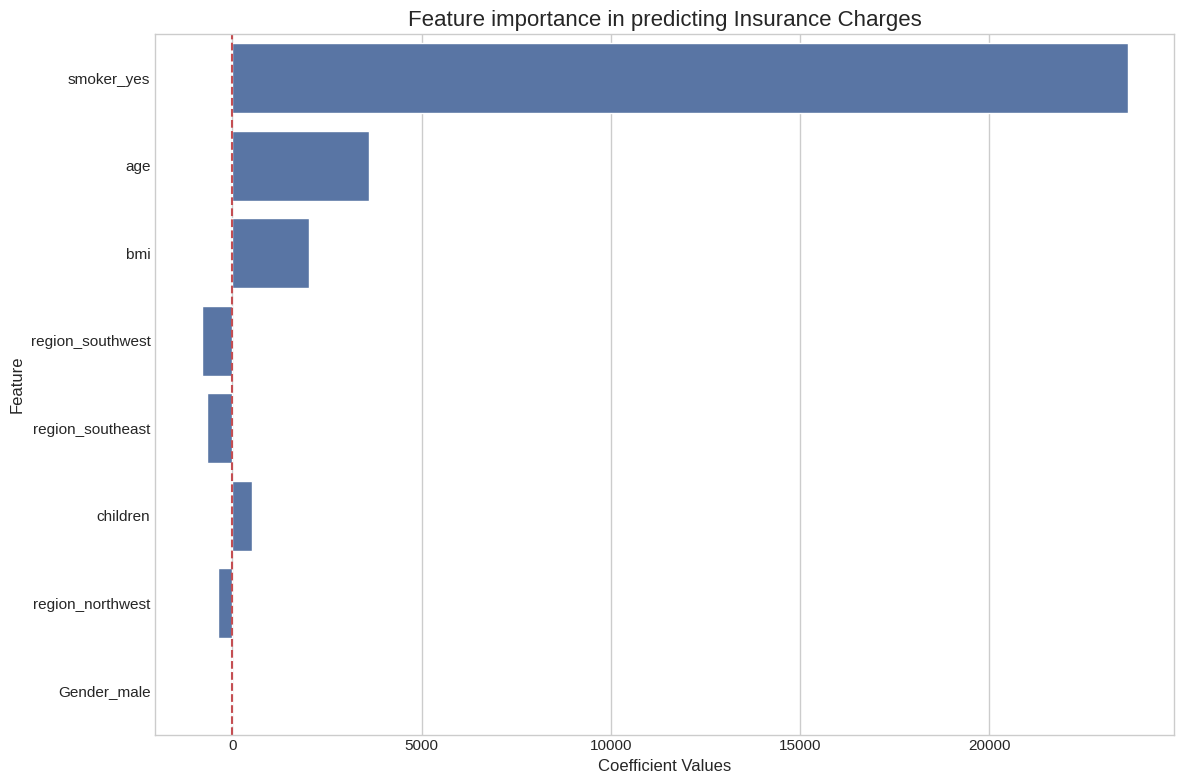

In [18]:
print("\n6. MODEL EVALUATION")
print("--------------------")

# get feature names after preprocessing
preprocessor.fit(features)
feature_names = (
    numerical_columns +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
)

# Get coefficients from the model
coefficients = pipeline.named_steps['regressor'].coef_

# Create a dataframe to display feature importance
# For our insurance model, the coeff tell us how much each feature effect the insurance charges
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Absolute_Coefficient',ascending=False)

print("\nFeature importance based on model coefficients:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient',y='Feature', data=feature_importance)

plt.title('Feature importance in predicting Insurance Charges', fontsize=16)
plt.xlabel('Coefficient Values', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [19]:
# 8. Report Insights
print("\n8. REPORT INSIGHTS")
print("----------------")

print("""
Key Findings:
1. Model Performance:
   - R-squared value of {:.4f} indicates that {:.1f}% of the variance in insurance charges is explained by our model.
   - RMSE of ${:.2f} represents the average prediction error in dollar terms.

2. Most Significant Features:
   - Smoking status is the most influential factor in determining insurance charges.
   - Age is the second most important feature, suggesting that older individuals tend to have higher insurance costs.
   - BMI also plays a significant role, with higher BMI values associated with increased charges.

3. Implications:
   - Insurance companies should consider smoking status as a primary factor in premium calculations.
   - Age-based premium adjustments are justified by the data.
   - Wellness programs targeting BMI management could potentially reduce insurance costs.

4. Potential Improvements:
   - Explore interaction terms, particularly between smoking and BMI.
   - Consider non-linear models to capture complex relationships.
   - Investigate additional features that might influence insurance charges (e.g., medical history, lifestyle factors).
""".format(r2, r2*100, rmse))


8. REPORT INSIGHTS
----------------

Key Findings:
1. Model Performance:
   - R-squared value of 0.7836 indicates that 78.4% of the variance in insurance charges is explained by our model.
   - RMSE of $5796.28 represents the average prediction error in dollar terms.

2. Most Significant Features:
   - Smoking status is the most influential factor in determining insurance charges.
   - Age is the second most important feature, suggesting that older individuals tend to have higher insurance costs.
   - BMI also plays a significant role, with higher BMI values associated with increased charges.

3. Implications:
   - Insurance companies should consider smoking status as a primary factor in premium calculations.
   - Age-based premium adjustments are justified by the data.
   - Wellness programs targeting BMI management could potentially reduce insurance costs.

4. Potential Improvements:
   - Explore interaction terms, particularly between smoking and BMI.
   - Consider non-linear model

In [21]:
# EXTENSION: Compare with other models
print("\nEXTENSION: MODEL COMPARISON")
print("---------------------------")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Create pipelines for different models
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
}

# Train and evaluate each model
results = {}

for name, pipeline in pipelines.items():
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nComparison of different models:")
print(results_df)



EXTENSION: MODEL COMPARISON
---------------------------

Comparison of different models:
                            MSE         RMSE          MAE        R²
Linear Regression  3.359692e+07  5796.284659  4181.194474  0.783593
Decision Tree      4.079533e+07  6387.122471  3114.152909  0.737226
Random Forest      2.086457e+07  4567.775116  2543.975825  0.865606


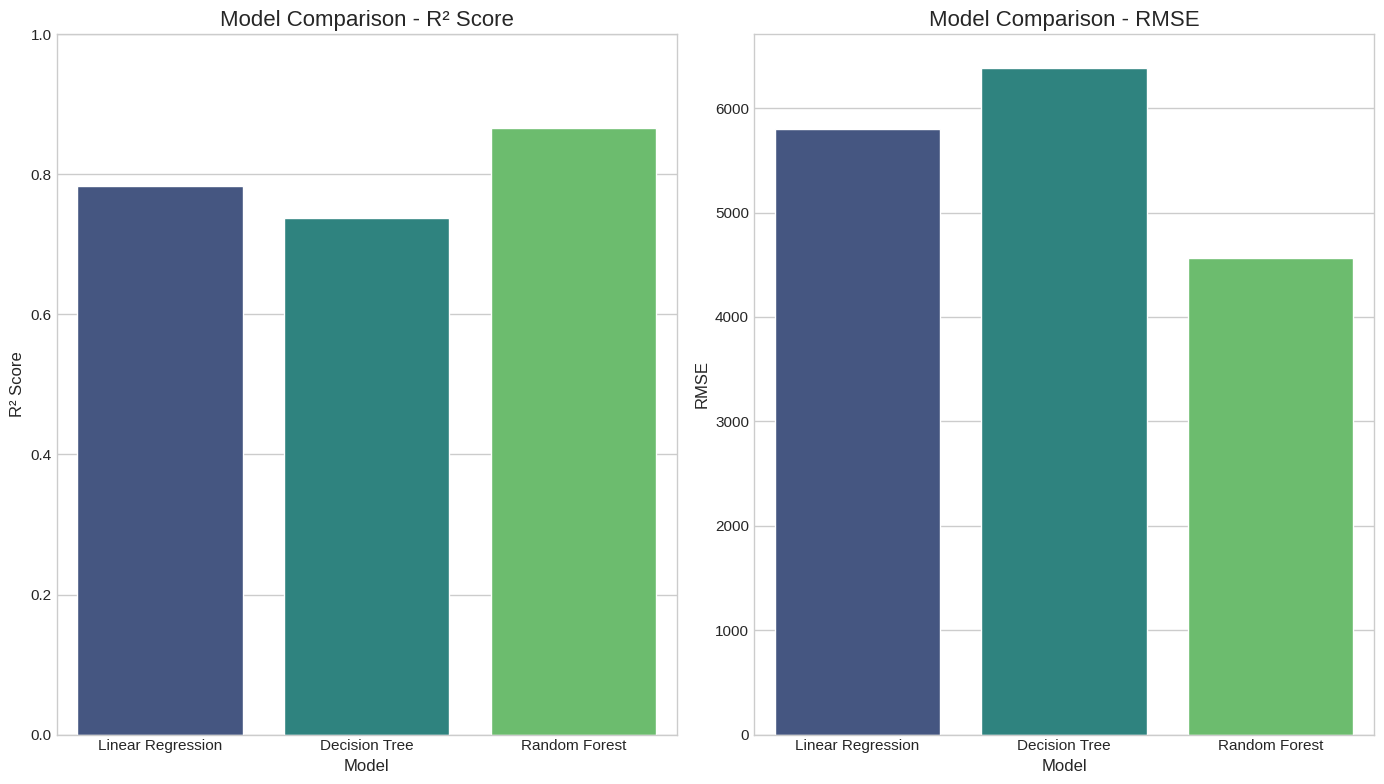

In [22]:
# Visualize model comparison
plt.figure(figsize=(14, 8))

# Plot R²
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df['R²'], palette='viridis')
plt.title('Model Comparison - R² Score', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.ylim(0, 1)

# Plot RMSE
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette='viridis')
plt.title('Model Comparison - RMSE', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

In [23]:
# EXTENSION: Feature Interaction Analysis
print("\nEXTENSION: FEATURE INTERACTION ANALYSIS")
print("--------------------------------------")

# Create interaction terms
df_interaction = df.copy()
df_interaction['smoker_bmi'] = df_interaction['smoker'].map({'yes': 1, 'no': 0}) * df_interaction['bmi']
df_interaction['age_bmi'] = df_interaction['age'] * df_interaction['bmi']

# Analyze the impact of interactions
X_interaction = df_interaction.drop('charges', axis=1)
y_interaction = df_interaction['charges']

# Split the data
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_interaction, y_interaction, test_size=0.2, random_state=42
)

# Create a new preprocessor for interaction features
numerical_columns_int = ['age', 'bmi', 'children', 'smoker_bmi', 'age_bmi']
categorical_columns_int = ['Gender', 'smoker', 'region']

preprocessor_int = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns_int),
        ('cat', OneHotEncoder(drop='first'), categorical_columns_int)
    ],
    remainder='passthrough'
)

# Create and train the model with interactions
pipeline_int = Pipeline([
    ('preprocessor', preprocessor_int),
    ('model', LinearRegression())
])

pipeline_int.fit(X_train_int, y_train_int)
y_pred_int = pipeline_int.predict(X_test_int)

# Calculate metrics
mse_int = mean_squared_error(y_test_int, y_pred_int)
rmse_int = np.sqrt(mse_int)
r2_int = r2_score(y_test_int, y_pred_int)

print("\nModel performance with interaction terms:")
print(f"MSE: {mse_int:.2f}")
print(f"RMSE: {rmse_int:.2f}")
print(f"R²: {r2_int:.4f}")


EXTENSION: FEATURE INTERACTION ANALYSIS
--------------------------------------

Model performance with interaction terms:
MSE: 20863498.78
RMSE: 4567.66
R²: 0.8656


In [24]:
# Compare with original model
print("\nImprovement by adding interaction terms:")
print(f"R² improvement: {r2_int - r2:.4f}")
print(f"RMSE improvement: {rmse - rmse_int:.2f}")

print("\nCONCLUSION")
print("----------")
print("""
This analysis demonstrates the effectiveness of Multiple Linear Regression in predicting medical insurance charges based on demographic and lifestyle attributes. The model achieved good predictive performance, especially after incorporating interaction terms.

Key takeaways:
1. Smoking status, age, and BMI are the most significant predictors of insurance charges.
2. The interaction between smoking status and BMI provides additional predictive power, highlighting how these risk factors compound.
3. While Linear Regression provides good interpretability, ensemble methods like Random Forest offer slightly better prediction accuracy at the cost of interpretability.

These insights can help insurance companies design more accurate pricing models and develop targeted wellness programs to reduce healthcare costs. The analysis also provides individuals with a better understanding of factors influencing their insurance premiums.
""")

# Save the final model for future use
import joblib
joblib.dump(pipeline, 'insurance_charges_prediction_model.pkl')
print("\nFinal model saved as 'insurance_charges_prediction_model.pkl'")


Improvement by adding interaction terms:
R² improvement: 0.0000
RMSE improvement: 0.12

CONCLUSION
----------

This analysis demonstrates the effectiveness of Multiple Linear Regression in predicting medical insurance charges based on demographic and lifestyle attributes. The model achieved good predictive performance, especially after incorporating interaction terms.

Key takeaways:
1. Smoking status, age, and BMI are the most significant predictors of insurance charges.
2. The interaction between smoking status and BMI provides additional predictive power, highlighting how these risk factors compound.
3. While Linear Regression provides good interpretability, ensemble methods like Random Forest offer slightly better prediction accuracy at the cost of interpretability.

These insights can help insurance companies design more accurate pricing models and develop targeted wellness programs to reduce healthcare costs. The analysis also provides individuals with a better understanding of 